<a href="https://colab.research.google.com/github/AMAYadav/PROJECTS-/blob/main/market_risk_01_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [264]:
url = "https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2022"
data= pd.read_html(url)[0]
data.head(10)

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
1,01/04/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,01/05/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,01/06/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,01/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
5,01/10/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.28,0.46,0.92,1.21,1.53,1.71,1.78,2.15,2.11
6,01/11/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.28,0.46,0.90,1.22,1.51,1.69,1.75,2.13,2.08
7,01/12/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.27,0.48,0.92,1.21,1.50,1.67,1.74,2.13,2.08
8,01/13/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.28,0.47,0.91,1.18,1.47,1.64,1.70,2.10,2.05
9,01/14/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.30,0.51,0.99,1.26,1.55,1.72,1.78,2.18,2.12


In [265]:
# data[['Date', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr','7 Yr', '10 Yr', '20 Yr', '30 Yr']]
df=data[['Date', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr','7 Yr', '10 Yr', '20 Yr', '30 Yr']].set_index('Date')
df.head(10)

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,
01/03/2022,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
01/04/2022,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
01/05/2022,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
01/06/2022,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
01/07/2022,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
01/10/2022,0.28,0.46,0.92,1.21,1.53,1.71,1.78,2.15,2.11
01/11/2022,0.28,0.46,0.90,1.22,1.51,1.69,1.75,2.13,2.08
01/12/2022,0.27,0.48,0.92,1.21,1.50,1.67,1.74,2.13,2.08
01/13/2022,0.28,0.47,0.91,1.18,1.47,1.64,1.70,2.10,2.05


In [308]:
df.tail(1)

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,
12/23/2022,4.67,4.66,4.31,4.09,3.86,3.83,3.75,3.99,3.82


In [266]:
effective_returns=df.pct_change(1).round(2)[1:]
effective_returns.head(10)

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,
01/04/2022,0.00,-0.05,-0.01,-0.02,0.00,0.01,0.02,0.02,0.03
01/05/2022,0.00,0.08,0.08,0.08,0.04,0.03,0.03,0.01,0.01
01/06/2022,0.05,0.10,0.06,0.05,0.03,0.02,0.01,0.00,0.00
01/07/2022,0.04,-0.04,-0.01,0.02,0.02,0.02,0.02,0.01,0.01
01/10/2022,0.17,0.07,0.06,0.03,0.02,0.01,0.01,0.00,0.00
01/11/2022,0.00,0.00,-0.02,0.01,-0.01,-0.01,-0.02,-0.01,-0.01
01/12/2022,-0.04,0.04,0.02,-0.01,-0.01,-0.01,-0.01,0.00,0.00
01/13/2022,0.04,-0.02,-0.01,-0.02,-0.02,-0.02,-0.02,-0.01,-0.01
01/14/2022,0.07,0.09,0.09,0.07,0.05,0.05,0.05,0.04,0.03


In [267]:
log_returns=np.log(df/df.shift(1)).round(2)[1:]
log_returns.head(10)

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,
01/04/2022,0.00,-0.05,-0.01,-0.02,0.00,0.01,0.02,0.02,0.03
01/05/2022,0.00,0.08,0.08,0.08,0.04,0.03,0.03,0.01,0.01
01/06/2022,0.04,0.09,0.06,0.04,0.03,0.02,0.01,0.00,0.00
01/07/2022,0.04,-0.05,-0.01,0.02,0.02,0.02,0.02,0.01,0.01
01/10/2022,0.15,0.07,0.06,0.03,0.02,0.01,0.01,0.00,0.00
01/11/2022,0.00,0.00,-0.02,0.01,-0.01,-0.01,-0.02,-0.01,-0.01
01/12/2022,-0.04,0.04,0.02,-0.01,-0.01,-0.01,-0.01,0.00,0.00
01/13/2022,0.04,-0.02,-0.01,-0.03,-0.02,-0.02,-0.02,-0.01,-0.01
01/14/2022,0.07,0.08,0.08,0.07,0.05,0.05,0.05,0.04,0.03


In [268]:
features= log_returns
x=features
x2=x

In [269]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

x=MinMaxScaler().fit_transform(x)
x_df=pd.DataFrame(x,columns=features.columns,index=features.index)
x_df

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,
01/04/2022,0.350,0.176471,0.307692,0.347826,0.45,0.529412,0.588235,0.666667,0.714286
01/05/2022,0.350,0.558824,0.653846,0.782609,0.65,0.647059,0.647059,0.583333,0.571429
01/06/2022,0.450,0.588235,0.576923,0.608696,0.60,0.588235,0.529412,0.500000,0.500000
01/07/2022,0.450,0.176471,0.307692,0.521739,0.55,0.588235,0.588235,0.583333,0.571429
01/10/2022,0.725,0.529412,0.576923,0.565217,0.55,0.529412,0.529412,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...
12/19/2022,0.375,0.352941,0.423077,0.521739,0.55,0.588235,0.647059,0.666667,0.714286
12/20/2022,0.350,0.323529,0.346154,0.478261,0.55,0.647059,0.647059,0.750000,0.714286
12/21/2022,0.325,0.294118,0.307692,0.391304,0.45,0.470588,0.470588,0.500000,0.500000


In [270]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_df)
principal_df=pd.DataFrame(pca.fit_transform(x_df),
                          columns=log_returns.columns,
                          index=x_df.index)
principal_df.head(10)

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,
01/04/2022,0.075803,-0.315427,0.048035,0.062401,-0.022260,-0.058221,-0.057288,-0.014341,0.010970
01/05/2022,0.457293,0.229999,-0.163216,-0.132710,-0.041270,-0.011671,0.003172,0.071401,-0.010268
01/06/2022,0.252454,0.277452,-0.028792,-0.093936,0.024644,0.006872,0.001550,-0.029312,0.005765
01/07/2022,0.127400,-0.112478,-0.020665,0.203027,-0.047095,-0.020333,0.026468,0.038172,-0.018827
01/10/2022,0.224150,0.334590,0.207230,0.046731,-0.038520,-0.023098,-0.044249,-0.013857,-0.006563
01/11/2022,-0.222181,0.041555,-0.023899,0.007462,-0.012148,0.009415,0.099373,0.033335,0.004688
01/12/2022,-0.117340,0.009603,-0.034121,-0.179460,0.014962,0.017541,-0.033489,-0.036030,0.020682
01/13/2022,-0.308293,0.009672,0.106479,0.053928,-0.029421,-0.009031,-0.033762,-0.038478,0.010654
01/14/2022,0.733274,0.091131,0.032579,-0.056114,-0.048567,0.045062,-0.027564,0.035239,0.010423


In [271]:
principal_df.shape
results=pd.DataFrame([pca.explained_variance_,
              pca.explained_variance_ratio_,
              np.cumsum(pca.explained_variance_ratio_)],columns=principal_df.columns,
             index=['explained_variance','explained_variance_ratio_','cumulative sum_explained_variance_ratio_'])*100
results

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
explained_variance,16.244991,2.113216,0.669633,0.259958,0.160569,0.109057,0.059655,0.042787,0.034015
explained_variance_ratio_,82.487502,10.730318,3.400210,1.319996,0.815324,0.553760,0.302910,0.217262,0.172718
cumulative sum_explained_variance_ratio_,82.487502,93.217820,96.618031,97.938026,98.753350,99.307110,99.610020,99.827282,100.000000


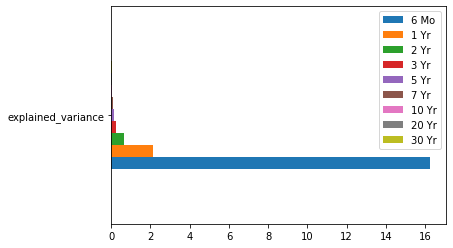

In [272]:
results.loc[['explained_variance',]].plot.barh(legend=True,)

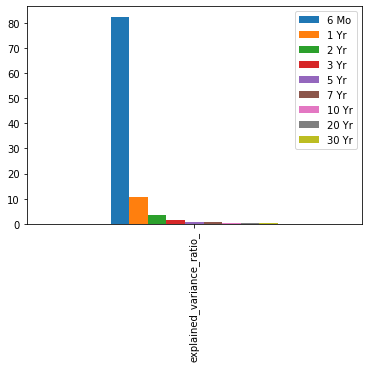

In [273]:
results.loc[['explained_variance_ratio_',]].plot.bar(legend=True,)

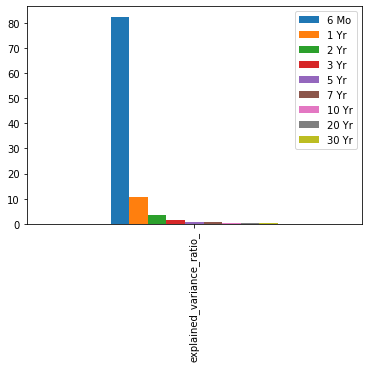

In [274]:
results.loc[['explained_variance_ratio_',]].plot.bar(legend=True,)

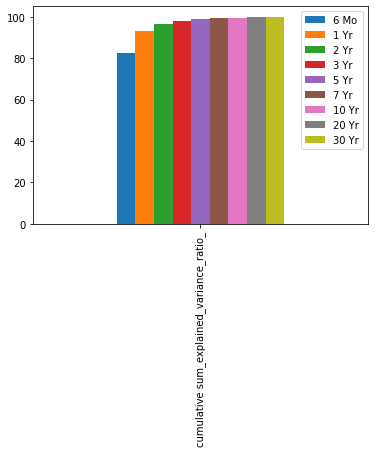

In [275]:
results.loc[['cumulative sum_explained_variance_ratio_',]].plot.bar(legend=True,)

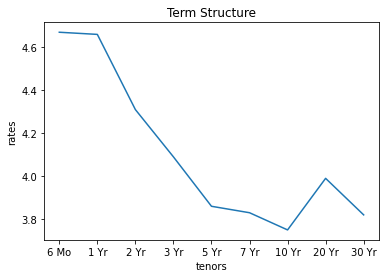

In [320]:
# fig = plt.figure()
# plt.plot(data)
# fig.suptitle('test title', fontsize=20)
# plt.xlabel('xlabel', fontsize=18)
# plt.ylabel('ylabel', fontsize=16)
# fig.savefig('test.jpg')
plt.ylabel(f'rates', fontsize=10)
plt.xlabel(f'tenors', fontsize=10)
fig=sns.lineplot(x=['6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr',
       '30 Yr'],y=[4.67, 4.66, 4.31, 4.09, 3.86, 3.83, 3.75, 3.99, 3.82],).set_title(f'Term Structure')